In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import lightgbm as lgbm
# import shap

from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

sns.set_style("whitegrid")
sns.despine()
sns.set_color_codes('bright')

<Figure size 432x288 with 0 Axes>

In [2]:
# df=pd.read_csv('audi.csv',skipinitialspace=True)
# df.head()
df=pd.read_csv('out.csv',skipinitialspace=True)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company,Target Range
0,T-Roc,2019,25000,Automatic,13904,Diesel,145.0,49.6,2.0,volkswagon,E
1,T-Roc,2019,26883,Automatic,4562,Diesel,145.0,49.6,2.0,volkswagon,A
2,T-Roc,2019,20000,Manual,7414,Diesel,145.0,50.4,2.0,volkswagon,A
3,T-Roc,2019,33492,Automatic,4825,Petrol,145.0,32.5,2.0,volkswagon,A
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5,volkswagon,A


In [3]:
df_clean = df.copy()

In [4]:
df=df[['model','year','transmission','fuelType','mileage','tax','mpg','engineSize','price']]
df_clean[df_clean['mpg']>100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company,Target Range
1006,Golf,2017,20495,Semi-Auto,23188,Hybrid,135.0,166.2,1.4,volkswagon,I
1017,Golf,2017,20495,Semi-Auto,23188,Hybrid,135.0,166.2,1.4,volkswagon,I
1478,Golf,2017,19991,Semi-Auto,21568,Hybrid,0.0,188.3,1.4,volkswagon,H
1558,Golf,2018,21995,Semi-Auto,16581,Hybrid,140.0,166.2,1.4,volkswagon,G
1653,Golf,2018,21298,Semi-Auto,18285,Hybrid,135.0,156.9,1.4,volkswagon,G
...,...,...,...,...,...,...,...,...,...,...,...
103976,A3,2016,13000,Automatic,72800,Hybrid,0.0,176.6,1.4,audi,FALSE
104158,A3,2015,11240,Automatic,89000,Hybrid,0.0,176.6,1.4,audi,FALSE
104311,Q5,2020,50000,Automatic,1246,Hybrid,140.0,117.7,2.0,audi,A
104365,A3,2015,14000,Automatic,63000,Hybrid,0.0,188.3,1.4,audi,FALSE


In [5]:
encoded_df=pd.get_dummies(df_clean, drop_first=True)
encoded_df.head()

,year,price,mileage,tax,mpg,engineSize,model_180,model_2 Series,model_200,model_220,...,company_volkswagon,Target Range_B,Target Range_C,Target Range_D,Target Range_E,Target Range_F,Target Range_FALSE,Target Range_G,Target Range_H,Target Range_I
0,2019,25000,13904,145.0,49.6,2.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,2019,26883,4562,145.0,49.6,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2019,20000,7414,145.0,50.4,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2019,33492,4825,145.0,32.5,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2019,22900,6500,150.0,39.8,1.5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
X=encoded_df.drop('price', axis = 1).values

In [7]:
y=encoded_df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)          
X_test = scaler.transform(X_test) 

In [16]:
lgbm_model = lgbm.LGBMRegressor(n_estimators=2000, max_depth=5, learning_rate=0.05, num_leaves=31)
# num_leaves=31,learning_rate=0.05,n_estimators=20)
# 1000 to 2000

In [17]:
lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],early_stopping_rounds=5000)

/Users/liulingyi/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 8.34352e+07
[2]	valid_0's l2: 7.70938e+07
[3]	valid_0's l2: 7.13709e+07
[4]	valid_0's l2: 6.62448e+07
[5]	valid_0's l2: 6.15299e+07
[6]	valid_0's l2: 5.72785e+07
[7]	valid_0's l2: 5.33752e+07
[8]	valid_0's l2: 4.98736e+07
[9]	valid_0's l2: 4.669e+07
[10]	valid_0's l2: 4.3794e+07
[11]	valid_0's l2: 4.11481e+07
[12]	valid_0's l2: 3.87398e+07
[13]	valid_0's l2: 3.65666e+07
[14]	valid_0's l2: 3.45458e+07
[15]	valid_0's l2: 3.27561e+07
[16]	valid_0's l2: 3.10246e+07
[17]	valid_0's l2: 2.94721e+07
[18]	valid_0's l2: 2.79632e+07
[19]	valid_0's l2: 2.66147e+07
[20]	valid_0's l2: 2.5354e+07
[21]	valid_0's l2: 2.4259e+07
[22]	valid_0's l2: 2.31808e+07
[23]	valid_0's l2: 2.23007e+07
[24]	valid_0's l2: 2.14064e+07
[25]	valid_0's l2: 2.05558e+07
[26]	valid_0's l2: 1.98188e+07
[27]	valid_0's l2: 1.91136e+07
[28]	valid_0's l2: 1.85123e+07
[29]	valid_0's l2: 1.79366e+07
[30]	valid_0's l2: 1.73742e+07
[31]	valid_0's l2: 1.6836e+07
[32]	valid_0's l2: 1.63557e+07
[33]	valid_0's l2: 1.59

LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=2000)

In [18]:
y_pred_lgbm = lgbm_model.predict(X_test)

In [19]:
print("Best rmse:", np.sqrt(MSE(y_pred_lgbm ,y_test)))
print("R2 using LightGBM: ", r2_score(y_test, y_pred_lgbm ))

Best rmse: 1997.5826674485998
R2 using LightGBM:  0.955873895096217


Text(0.5, 1.0, 'LightGBM vs XGBoost Regression')

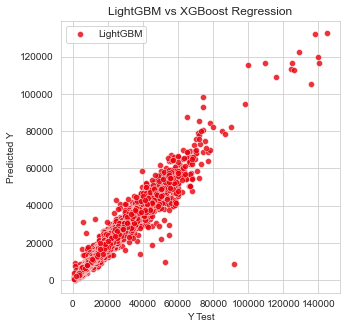

In [20]:
plt.figure(figsize = (5,5))
sns.scatterplot(x=y_test, y=y_pred_lgbm, label='LightGBM', alpha=0.8, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left')
plt.title('LightGBM vs XGBoost Regression')

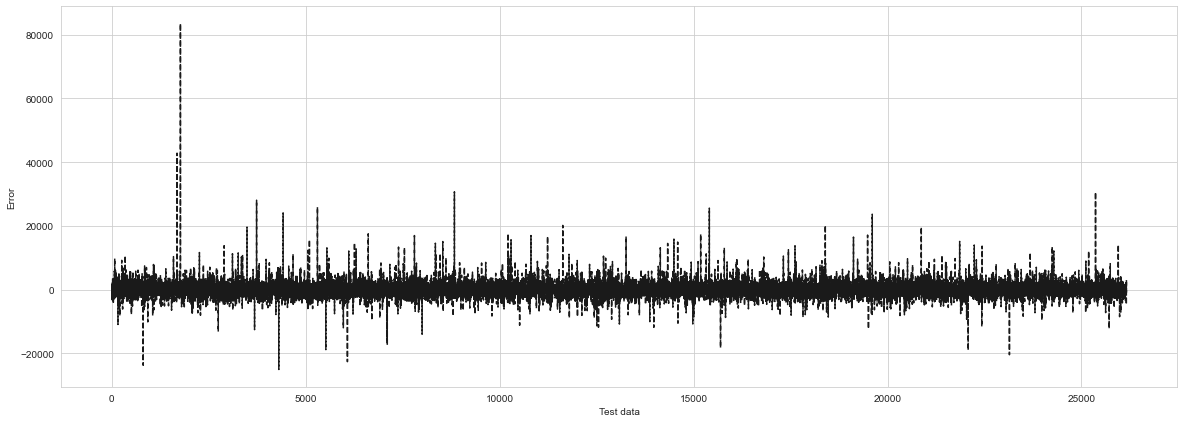

In [21]:
plt.figure(figsize=(20,7))
plt.plot(y_test-y_pred_lgbm,'k--')  
plt.ylabel('Error')
plt.xlabel('Test data')
plt.show()

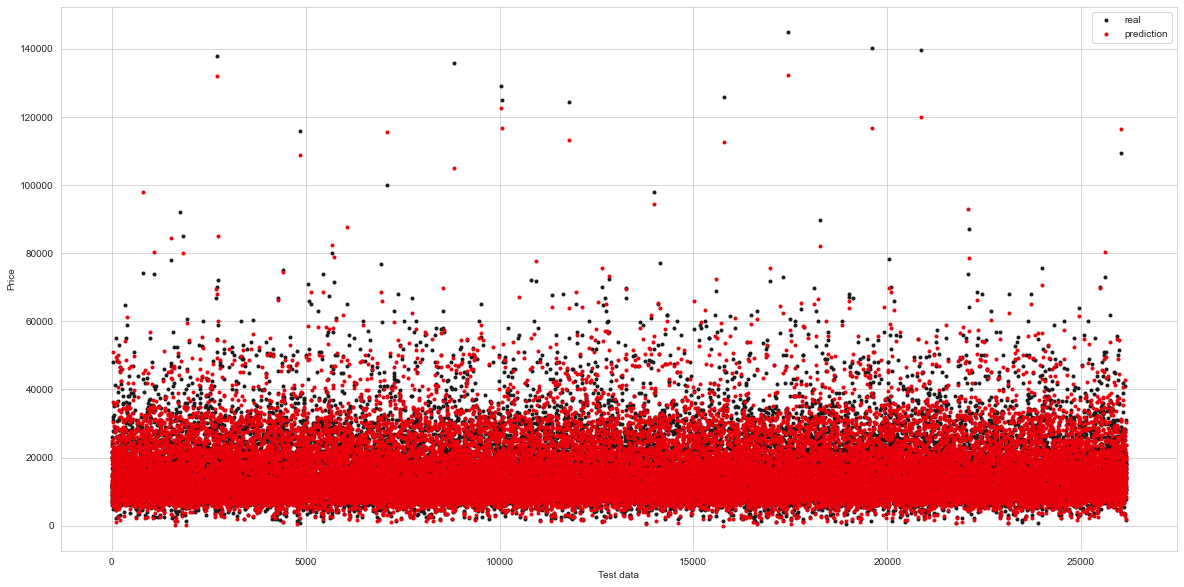

In [22]:
plt.figure(figsize=(20,10))
plt.plot(y_test,'k.')
plt.plot(y_pred_lgbm,'r.')
plt.ylabel('Price')
plt.xlabel('Test data')
plt.legend(['real', 'prediction'])  # 预测的散点值与真实散点值画图
plt.show()